In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 42.9 MB/s eta 0:00:00


In [2]:
!apt-get install unzip -y

!wget https://archive.ics.uci.edu/static/public/601/ai4i+2020+predictive+maintenance+dataset.zip -O dataset.zip

!unzip dataset.zip -d data

# List files
!ls data

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
--2025-12-21 07:45:57--  https://archive.ics.uci.edu/static/public/601/ai4i+2020+predictive+maintenance+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset.zip’

dataset.zip             [  <=>               ] 509.93K  1.56MB/s    in 0.3s    

2025-12-21 07:45:58 (1.56 MB/s) - ‘dataset.zip’ saved [522170]

Archive:  dataset.zip
 extracting: data/ai4i2020.csv       
ai4i2020.csv


In [3]:
import pandas as pd

df = pd.read_csv('data/ai4i2020.csv')
print(f"* Shape of the data: {df.shape}")  # Shape
print("============================================================================================================================")
print(f"* Data Names: {df.columns}")  # Columns
print("============================================================================================================================")
print(df.head())  # Table

* Shape of the data: (10000, 14)
* Data Names: Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498        

In [4]:
print(df.info())
print("============================================================================================================================")
print(df.isnull().sum())
print("============================================================================================================================")
print(df.describe())
print("============================================================================================================================")
print(df['Machine failure'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Drop IDs
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

# Encode label
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])  # 0=L, 1=M, 2=H

# Outlier clipping
features_to_clip = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
for col in features_to_clip:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

# Normalization
scaler = MinMaxScaler()
df[features_to_clip + ['Type']] = scaler.fit_transform(df[features_to_clip + ['Type']])

print(df.head())
print("============================================================================================================================")
print(df.describe())

   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0   1.0             0.268293                 0.303030                0.302297   
1   0.5             0.280488                 0.318182                0.145672   
2   0.5             0.268293                 0.287879                0.244247   
3   0.5             0.280488                 0.303030                0.173054   
4   0.5             0.280488                 0.318182                0.145672   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0     0.566161         0.000000                0    0    0    0    0    0  
1     0.642082         0.013514                0    0    0    0    0    0  
2     0.709328         0.022523                0    0    0    0    0    0  
3     0.494577         0.031532                0    0    0    0    0    0  
4     0.505423         0.040541                0    0    0    0    0    0  
               Type  Air temperature [K]  Process tempera

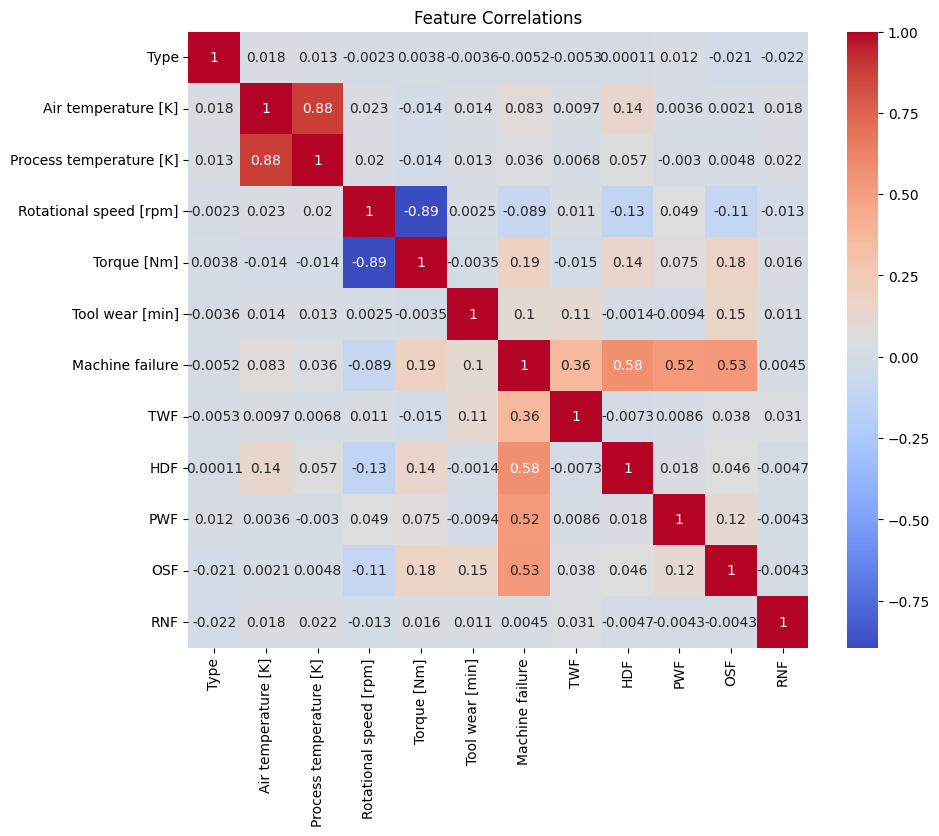

In [6]:
# Save processed CSV
df.to_csv('processed_data.csv', index=False)

# Quick correlation viz
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.savefig('correlation_heatmap.png')
plt.show()